This is how much space the figure will take up on letter paper


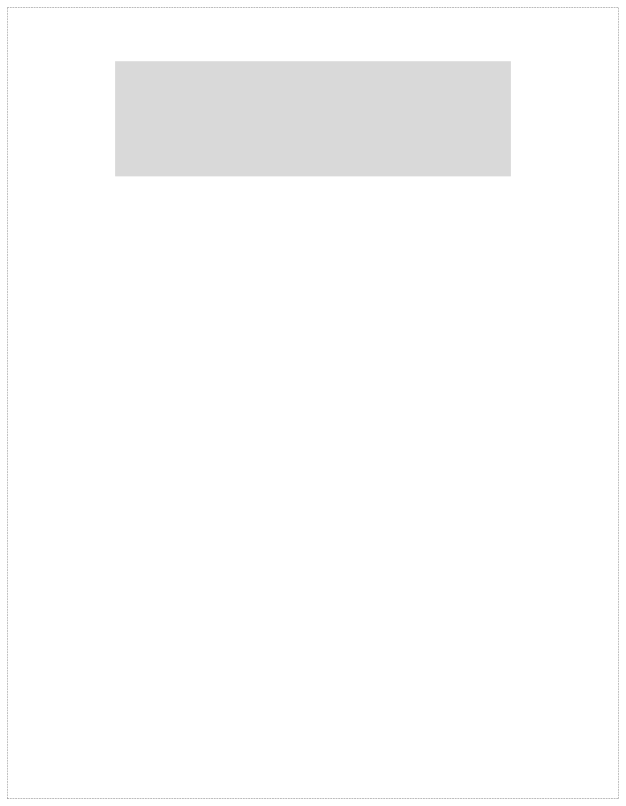

In [29]:
__PRODUCTION__ = 0
__NAME__       = 'motivation'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

In [30]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import pickle

from symfac.experimental import RBFExpansionV2
from symfac.experimental import RBFExpansionMiniBatch

In [44]:
k = 4
dim = 64
batch_size = 200
max_steps = 50000

In [45]:

torch.manual_seed(0)
K1 = torch.normal(0.0, 1.0, (dim, dim), dtype=torch.float32)

In [46]:
u_start=1/1000*torch.randn([batch_size, dim, k], device="cuda") 
v_start=1/1000*torch.randn([batch_size, dim, k], device="cuda") 

a=torch.randn([batch_size, k], device="cuda")
b=torch.randn([batch_size], device="cuda")


In [47]:
u0 = torch.clone(u_start)
v0 = torch.clone(v_start)
a0 = torch.clone(a)
b0 = torch.clone(b)
fac0 = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=max_steps, algorithm='SGD')
fac0.fit(
    K1,
    u0=u0,
    v0=v0,
    a0=a0,
    b0=b0
  )
fac0.to_pickle(f'data/optim-SGD.pickle')
print(torch.min(fac0.report.loss_best))

100%|██████████| 50000/50000 [01:50<00:00, 452.75it/s]


tensor(0.7151)


In [48]:
u0 = torch.clone(u_start)
v0 = torch.clone(v_start)
a0 = torch.clone(a)
b0 = torch.clone(b)
fac1 = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=max_steps, algorithm='Adam')
fac1.fit(
    K1,
    u0=u0,
    v0=v0,
    a0=a0,
    b0=b0
  )
fac1.to_pickle(f'data/optim-Adam.pickle')
print(torch.min(fac1.report.loss_best))

100%|██████████| 50000/50000 [01:53<00:00, 440.66it/s]


tensor(0.5554)


In [49]:
u0 = torch.clone(u_start)
v0 = torch.clone(v_start)
a0 = torch.clone(a)
b0 = torch.clone(b)

fac2 = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=max_steps, algorithm='Adadelta')
fac2.fit(
    K1,
    u0=u0,
    v0=v0,
    a0=a0,
    b0=b0
  )
fac2.to_pickle(f'data/optim-Adadelta.pickle')
print(torch.min(fac2.report.loss_best))

100%|██████████| 50000/50000 [01:56<00:00, 430.72it/s]


tensor(0.7189)


In [50]:
u0 = torch.clone(u_start)
v0 = torch.clone(v_start)
a0 = torch.clone(a)
b0 = torch.clone(b)

fac3 = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=max_steps, algorithm='Adagrad')
fac3.fit(
    K1,
    u0=u0,
    v0=v0,
    a0=a0,
    b0=b0
  )
fac3.to_pickle(f'data/optim-Adagrad.pickle')
print(torch.min(fac3.report.loss_best))

100%|██████████| 50000/50000 [01:53<00:00, 439.49it/s]


tensor(0.5457)


In [51]:
u0 = torch.clone(u_start)
v0 = torch.clone(v_start)
a0 = torch.clone(a)
b0 = torch.clone(b)

fac4 = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=max_steps, algorithm='RMSprop')
fac4.fit(
    K1,
    u0=u0,
    v0=v0,
    a0=a0,
    b0=b0
  )
fac4.to_pickle(f'data/optim-RMSprop.pickle')
print(torch.min(fac4.report.loss_best))

100%|██████████| 50000/50000 [01:50<00:00, 452.72it/s]


tensor(0.5644)


In [52]:
u0 = torch.clone(u_start)
v0 = torch.clone(v_start)
a0 = torch.clone(a)
b0 = torch.clone(b)

fac5 = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=max_steps, algorithm='AdamW')
fac5.fit(
    K1,
    u0=u0,
    v0=v0,
    a0=a0,
    b0=b0
  )
fac5.to_pickle(f'data/optim-AdamW.pickle')
print(torch.min(fac5.report.loss_best))

100%|██████████| 50000/50000 [01:52<00:00, 444.62it/s]


tensor(0.5459)


In [53]:
u0 = torch.clone(u_start)
v0 = torch.clone(v_start)
a0 = torch.clone(a)
b0 = torch.clone(b)

fac6 = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=max_steps, algorithm='ASGD')
fac6.fit(
    K1,
    u0=u0,
    v0=v0,
    a0=a0,
    b0=b0
  )
fac6.to_pickle(f'data/optim-ASGD.pickle')
print(torch.min(fac6.report.loss_best))

100%|██████████| 50000/50000 [01:51<00:00, 447.32it/s]


tensor(0.7272)


In [54]:
plt.loglog(
    fac0.report.loss_history_ticks,
    fac0.report.loss_history.min(axis=1),
    '-',
    lw = 1
)
plt.loglog(
    fac1.report.loss_history_ticks,
    fac1.report.loss_history.min(axis=1),
    '-',
    lw = 2
)
plt.loglog(
    fac2.report.loss_history_ticks,
    fac2.report.loss_history.min(axis=1),
    '--'
)

plt.loglog(
    fac3.report.loss_history_ticks,
    fac3.report.loss_history.min(axis=1),
    ':'
)
plt.loglog(
    fac4.report.loss_history_ticks,
    fac4.report.loss_history.min(axis=1)
)

plt.loglog(
    fac5.report.loss_history_ticks,
    fac5.report.loss_history.min(axis=1),
    '-.'
)

plt.loglog(
    fac6.report.loss_history_ticks,
    fac6.report.loss_history.min(axis=1),
    ','
)

plt.legend(('SGD', 'Adam', 'Adadelta', 'Adagrad', 'RMSprop', 'AdamW', 'ASGD'),
           loc='lower left')
plt.xlabel("training steps")


plt.ylabel("mean square error loss")

plt.savefig("fig-optimization.pdf", dpi=300)
plt.show()

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
'D-DIN.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'def

In [181]:
open('data/gaus-optimization-methods-SGD.pickle', 'wb').write(pickle.dumps([fac0.report.loss_history_ticks,fac0.report.loss_history.min(axis=1),'SGD']))
open('data/gaus-optimization-methods-Adam.pickle', 'wb').write(pickle.dumps([fac1.report.loss_history_ticks,fac1.report.loss_history.min(axis=1),'Adam']))
open('data/gaus-optimization-methods-Adadelta.pickle', 'wb').write(pickle.dumps([fac2.report.loss_history_ticks,fac2.report.loss_history.min(axis=1),'Adadelta']))
open('data/gaus-optimization-methods-Adagrad', 'wb').write(pickle.dumps([fac3.report.loss_history_ticks,fac3.report.loss_history.min(axis=1),'Adagrad']))
open('data/gaus-optimization-methods-RMSprop.pickle', 'wb').write(pickle.dumps([fac4.report.loss_history_ticks,fac4.report.loss_history.min(axis=1),'RMSprop']))
open('data/gaus-optimization-methods-AdamW.pickle', 'wb').write(pickle.dumps([fac5.report.loss_history_ticks,fac5.report.loss_history.min(axis=1),'AdamW']))
open('data/gaus-optimization-methods-ASGD.pickle', 'wb').write(pickle.dumps([fac6.report.loss_history_ticks,fac6.report.loss_history.min(axis=1),'ASGD']))

550037

# Histograms

100%|██████████| 30000/30000 [01:04<00:00, 464.75it/s]


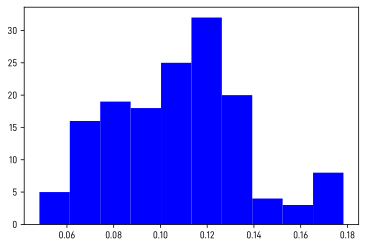

[]


In [49]:
errors = []
bs=150
for k in range(2,3):
    u0=torch.randn([bs, len(K), k]) 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac_1 = RBFExpansionV2(k=k, batch_size=bs, max_steps=30000)
    fac_1.fith(
        Kt,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac_1.report.loss_best, color='b', label='1')
    plt.show()

print(errors)

100%|██████████| 30000/30000 [00:58<00:00, 510.97it/s]


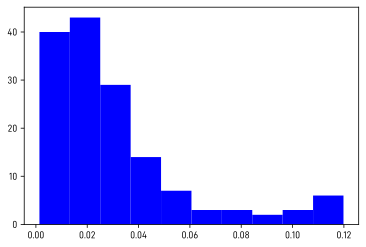

[]


In [58]:
errors = []
bs=150
for k in range(3,4):
    u0=1/1000*torch.randn([bs, len(K), k]) 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac_1000 = RBFExpansionV2(k=k, batch_size=bs, max_steps=30000)
    fac_1000.fith(
        Kt,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac_1000.report.loss_best, color='b', label='1')
    plt.show()

print(errors)

100%|██████████| 30000/30000 [00:45<00:00, 659.59it/s]


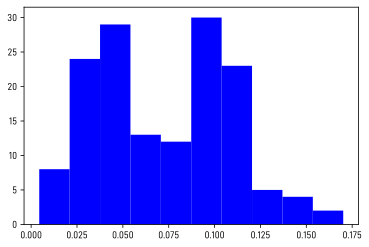

[]


In [59]:
errors = []
bs=150
for k in range(2,3):
    u0=1/10*torch.randn([bs, len(K), k]) 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac_10 = RBFExpansionV2(k=k, batch_size=bs, max_steps=30000)
    fac_10.fith(
        Kt,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac_10.report.loss_best, color='b', label='1')
    plt.show()

print(errors)

In [57]:
print(torch.min(fac_1000.report.loss_best))

tensor(0.0053)


'D-DIN.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


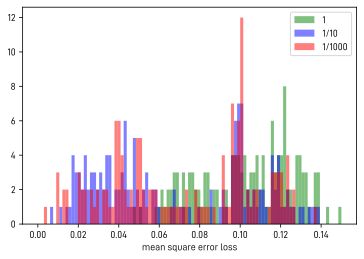

In [52]:
HIST_BINS = np.linspace(0, 0.15, 100)
plt.hist(fac_1.report.loss_best, HIST_BINS, alpha = 0.5, color='g', label='1')
plt.hist(fac_10.report.loss_best, HIST_BINS, alpha = 0.5, color='b', label='1/10')
plt.hist(fac_1000.report.loss_best,HIST_BINS, alpha = 0.5, color='r', label='1/1000')
plt.legend(loc="upper right")
plt.xlabel("mean square error loss")
plt.savefig("fig-optimization-2.pdf", dpi=300)
plt.show()

In [82]:
open('optim_hists.pickle', 'wb').write(pickle.dumps([fac_1.report.loss_best, fac_10.report.loss_best, fac_1000.report.loss_best]))

2773

# Stochastic counterparts

In [63]:
fac_mini_1 = RBFExpansionMiniBatch(k=k, mini_batch_size= 4 * Kt.shape[0], algorithm='Adam', batch_size=batch_size, max_steps=max_steps, mini_batch_by='elements')
fac_mini_1.fit_custom(
        Kt,
        f=lambda u, a, b:
            torch.sum(
                fac_mini_1.rbf(u[..., :, None, :] - u[..., None, :, :]) *
                a[..., None, None, :],
                dim=-1
            ) + b[..., None, None],
        f_minibatch=lambda i, j, u, a, b:
            torch.sum(
                fac_mini_1.rbf(u[..., i, :] - u[..., j, :]) * a[..., None, :],
            dim=-1
        ) + b[..., None],
        seed=0,
        u=0.001 * fac_mini_1.randn(fac_mini_1.batch_size, Kt.shape[0], fac_mini_1.k),
        a=fac_mini_1.randn(fac_mini_1.batch_size, fac_mini_1.k),
        b=fac_mini_1.randn(fac_mini_1.batch_size)
)

100%|██████████| 30000/30000 [00:55<00:00, 540.92it/s]


In [64]:
print(torch.min(fac_mini_1.report.loss_best))

tensor(0.0024)


In [17]:
fac_mini_2 = RBFExpansionMiniBatch(k=k, mini_batch_size= 4 * Kt.shape[0], algorithm='Adadelta', batch_size=150, max_steps=30000, mini_batch_by='elements')
fac_mini_2.fit_custom(
        Kt,
        f=lambda u, a, b:
            torch.sum(
                fac_mini_2.rbf(u[..., :, None, :] - u[..., None, :, :]) *
                a[..., None, None, :],
                dim=-1
            ) + b[..., None, None],
        f_minibatch=lambda i, j, u, a, b:
            torch.sum(
                fac_mini_2.rbf(u[..., i, :] - u[..., j, :]) * a[..., None, :],
            dim=-1
        ) + b[..., None],
        seed=0,
        u=0.001 * fac_mini_2.randn(fac_mini_2.batch_size, Kt.shape[0], fac_mini_2.k),
        a=fac_mini_2.randn(fac_mini_2.batch_size, fac_mini_2.k),
        b=fac_mini_2.randn(fac_mini_2.batch_size)
)

100%|██████████| 30000/30000 [00:45<00:00, 663.23it/s]


In [18]:
fac_mini_3 = RBFExpansionMiniBatch(k=k, mini_batch_size= 4 * Kt.shape[0], algorithm='SGD', batch_size=150, max_steps=30000, mini_batch_by='elements')
fac_mini_3.fit_custom(
        Kt,
        f=lambda u, a, b:
            torch.sum(
                fac_mini_3.rbf(u[..., :, None, :] - u[..., None, :, :]) *
                a[..., None, None, :],
                dim=-1
            ) + b[..., None, None],
        f_minibatch=lambda i, j, u, a, b:
            torch.sum(
                fac_mini_3.rbf(u[..., i, :] - u[..., j, :]) * a[..., None, :],
            dim=-1
        ) + b[..., None],
        seed=0,
        u=0.001 * fac_mini_3.randn(fac_mini_3.batch_size, Kt.shape[0], fac_mini_3.k),
        a=fac_mini_3.randn(fac_mini_3.batch_size, fac_mini_3.k),
        b=fac_mini_3.randn(fac_mini_3.batch_size)
)

100%|██████████| 30000/30000 [00:38<00:00, 781.51it/s]


In [19]:
fac_mini_4 = RBFExpansionMiniBatch(k=k, mini_batch_size= 4 * Kt.shape[0], algorithm='Adagrad', batch_size=150, max_steps=30000, mini_batch_by='elements')
fac_mini_4.fit_custom(
        Kt,
        f=lambda u, a, b:
            torch.sum(
                fac_mini_4.rbf(u[..., :, None, :] - u[..., None, :, :]) *
                a[..., None, None, :],
                dim=-1
            ) + b[..., None, None],
        f_minibatch=lambda i, j, u, a, b:
            torch.sum(
                fac_mini_4.rbf(u[..., i, :] - u[..., j, :]) * a[..., None, :],
            dim=-1
        ) + b[..., None],
        seed=0,
        u=0.001 * fac_mini_4.randn(fac_mini_4.batch_size, Kt.shape[0], fac_mini_4.k),
        a=fac_mini_4.randn(fac_mini_4.batch_size, fac_mini_1.k),
        b=fac_mini_4.randn(fac_mini_4.batch_size)
)

100%|██████████| 30000/30000 [00:40<00:00, 736.85it/s]


In [20]:
fac_mini_5 = RBFExpansionMiniBatch(k=k, mini_batch_size= 4 * Kt.shape[0], algorithm='RMSprop', batch_size=150, max_steps=30000, mini_batch_by='elements')
fac_mini_5.fit_custom(
        Kt,
        f=lambda u, a, b:
            torch.sum(
                fac_mini_5.rbf(u[..., :, None, :] - u[..., None, :, :]) *
                a[..., None, None, :],
                dim=-1
            ) + b[..., None, None],
        f_minibatch=lambda i, j, u, a, b:
            torch.sum(
                fac_mini_5.rbf(u[..., i, :] - u[..., j, :]) * a[..., None, :],
            dim=-1
        ) + b[..., None],
        seed=0,
        u=0.001 * fac_mini_1.randn(fac_mini_5.batch_size, Kt.shape[0], fac_mini_5.k),
        a=fac_mini_5.randn(fac_mini_5.batch_size, fac_mini_5.k),
        b=fac_mini_5.randn(fac_mini_5.batch_size)
)

100%|██████████| 30000/30000 [00:57<00:00, 522.40it/s]


In [22]:
fac_mini_6 = RBFExpansionMiniBatch(k=k, mini_batch_size= 4 * Kt.shape[0], algorithm='ASGD', batch_size=150, max_steps=30000, mini_batch_by='elements')
fac_mini_6.fit_custom(
        Kt,
        f=lambda u, a, b:
            torch.sum(
                fac_mini_6.rbf(u[..., :, None, :] - u[..., None, :, :]) *
                a[..., None, None, :],
                dim=-1
            ) + b[..., None, None],
        f_minibatch=lambda i, j, u, a, b:
            torch.sum(
                fac_mini_6.rbf(u[..., i, :] - u[..., j, :]) * a[..., None, :],
            dim=-1
        ) + b[..., None],
        seed=0,
        u=0.001 * fac_mini_1.randn(fac_mini_6.batch_size, Kt.shape[0], fac_mini_6.k),
        a=fac_mini_6.randn(fac_mini_6.batch_size, fac_mini_6.k),
        b=fac_mini_6.randn(fac_mini_6.batch_size)
)

100%|██████████| 30000/30000 [01:06<00:00, 450.94it/s]


In [21]:
fac_mini_7 = RBFExpansionMiniBatch(k=k, mini_batch_size= 4 * Kt.shape[0], algorithm='AdamW', batch_size=150, max_steps=30000, mini_batch_by='elements')
fac_mini_7.fit_custom(
        Kt,
        f=lambda u, a, b:
            torch.sum(
                fac_mini_7.rbf(u[..., :, None, :] - u[..., None, :, :]) *
                a[..., None, None, :],
                dim=-1
            ) + b[..., None, None],
        f_minibatch=lambda i, j, u, a, b:
            torch.sum(
                fac_mini_7.rbf(u[..., i, :] - u[..., j, :]) * a[..., None, :],
            dim=-1
        ) + b[..., None],
        seed=0,
        u=0.001 * fac_mini_7.randn(fac_mini_7.batch_size, Kt.shape[0], fac_mini_7.k),
        a=fac_mini_7.randn(fac_mini_7.batch_size, fac_mini_7.k),
        b=fac_mini_7.randn(fac_mini_7.batch_size)
)

100%|██████████| 30000/30000 [01:14<00:00, 401.18it/s]


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

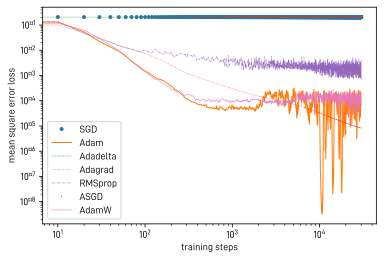

In [23]:
plt.loglog(
    fac_mini_3.report.loss_history_ticks,
    fac_mini_3.report.loss_history.min(axis=1),
    '.'
)

plt.loglog(
    fac_mini_1.report.loss_history_ticks,
    fac_mini_1.report.loss_history.min(axis=1),
    '-',
    lw = 1
)
plt.loglog(
    fac_mini_2.report.loss_history_ticks,
    fac_mini_2.report.loss_history.min(axis=1),
    '--'
)

plt.loglog(
    fac_mini_4.report.loss_history_ticks,
    fac_mini_4.report.loss_history.min(axis=1),
    ':'
)

plt.loglog(
    fac_mini_5.report.loss_history_ticks,
    fac_mini_5.report.loss_history.min(axis=1),
    '-.'
)

plt.loglog(
    fac_mini_6.report.loss_history_ticks,
    fac_mini_6.report.loss_history.min(axis=1),
    ','
)
plt.loglog(
    fac_mini_7.report.loss_history_ticks,
    fac_mini_7.report.loss_history.min(axis=1)
)

plt.legend(('SGD', 'Adam', 'Adadelta', 'Adagrad', 'RMSprop', 'ASGD', 'AdamW'),
           loc='lower left')
plt.xlabel("training steps")


plt.ylabel("mean square error loss")

plt.savefig("fig-optimization-stoc.pdf", dpi=300)
plt.show()

In [25]:
open('optim_stoc_runs_1.pickle', 'wb').write(pickle.dumps([fac_mini_1.report.loss_history_ticks,fac_mini_1.report.loss_history.min(axis=1),'Adam']))
open('optim_stoc_runs_2.pickle', 'wb').write(pickle.dumps([fac_mini_2.report.loss_history_ticks,fac_mini_2.report.loss_history.min(axis=1),'Adadelta']))
open('optim_stoc_runs_3.pickle', 'wb').write(pickle.dumps([fac_mini_3.report.loss_history_ticks,fac_mini_3.report.loss_history.min(axis=1),'SGD']))
open('optim_stoc_runs_4.pickle', 'wb').write(pickle.dumps([fac_mini_4.report.loss_history_ticks,fac_mini_4.report.loss_history.min(axis=1),'Adagrad']))
open('optim_stoc_runs_5.pickle', 'wb').write(pickle.dumps([fac_mini_5.report.loss_history_ticks,fac_mini_5.report.loss_history.min(axis=1),'RMSprop']))
open('optim_stoc_runs_6.pickle', 'wb').write(pickle.dumps([fac_mini_6.report.loss_history_ticks,fac_mini_6.report.loss_history.min(axis=1),'ASGD']))
open('optim_stoc_runs_7.pickle', 'wb').write(pickle.dumps([fac_mini_7.report.loss_history_ticks,fac_mini_7.report.loss_history.min(axis=1),'AdamW']))

33147

# Sandbox below

---

In [3]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__), dpi=300))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.01
dx = 0.25
w = 0.23
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.2,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]

def svd_reconstruction(k):
    U, S, V = np.linalg.svd(K)
    return torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :])

image_style = dict(
    cmap='viridis'
)
axs[0].imshow(K, **image_style)
axs[1].imshow(svd_reconstruction(1), **image_style)
axs[2].imshow(svd_reconstruction(2), **image_style)
axs[3].imshow(svd_reconstruction(4), **image_style)

title_style = dict(
    fontsize=7,
    y=1.02,
    va='top'
)

axs[0].set_title(r'\textbf{Difference of 2 Components}', **title_style)
axs[1].set_title(r'\textbf{Rank-1}', **title_style)
axs[2].set_title(r'\textbf{Rank-2}', **title_style)
axs[3].set_title(r'\textbf{Rank-4}', **title_style)

for ax in axs:
    ax.patch.set_facecolor('w')
    ax.set_xticks([])
    ax.set_yticks([])

ax_group_rbf = fig.make_axes(
    left=axs[0].left, right=axs[0].right, top=0, bottom=1,
    style='blank', zorder=-10
)
ax_group_svd = fig.make_axes(
    left=axs[1].left, right=axs[3].right, top=0, bottom=1,
    style='blank', zorder=-10
)
for ax_group in [ax_group_rbf, ax_group_svd]:
    ax_group.axhline(
        0.9,
        lw=0.5,
        color='k',
    )
group_text_style = dict(
    fontsize=8,
    ha='center',
    va='bottom',
)
ax_group_rbf.text(0.5, 0.92, r'\textbf{RBF Matrix}', **group_text_style)
ax_group_svd.text(0.5, 0.92, r'\textbf{SVD Reconstruction}', **group_text_style)


if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf', dpi=300)
else:
    fig.savefig(f'svg/{__NAME__}.svg', dpi=300)
plt.show()

NameError: name 'K' is not defined

In [56]:
!make -f Makefile.figures fig-"$__NAME__".pdf 2>&1 | tail -n 1

make: 'fig-motivation.pdf' is up to date.
